## **Decision Tree**

In [1]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1000
           1       0.92      0.92      0.92      1000

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix:
[[915  85]
 [ 77 923]]


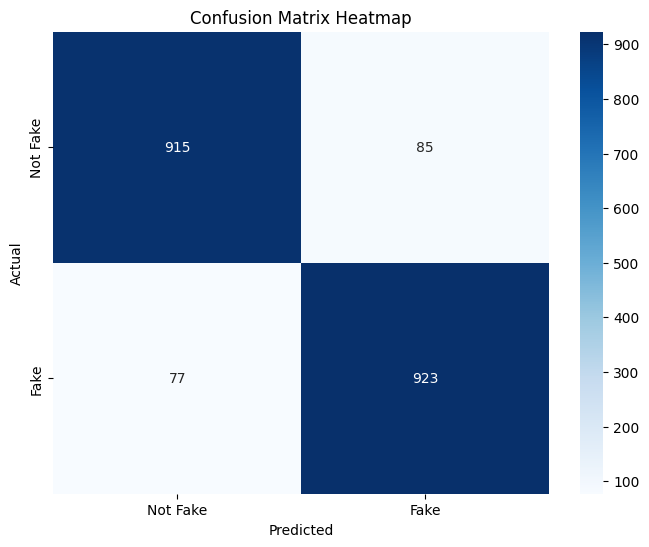

AUC-ROC: 0.9190


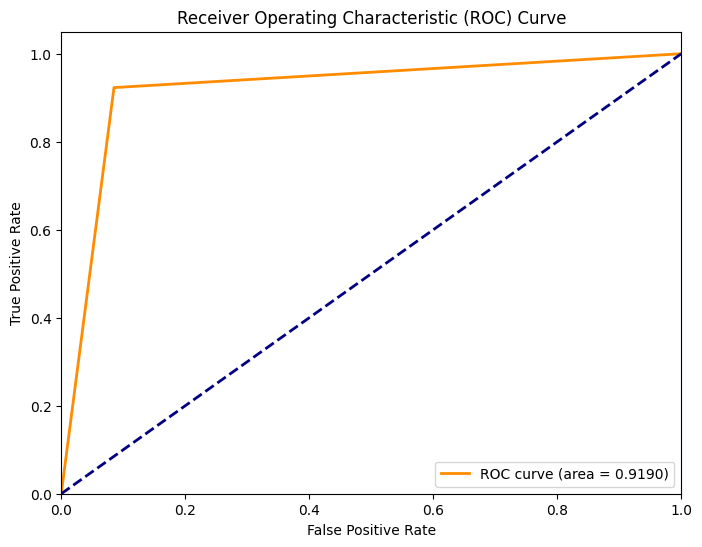

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# load data
data = pd.read_csv('/content/drive/MyDrive/data/elongated_word_10k.csv')
X = data["news"]
y = data["is_fake"]

# vectorize with TF-IDF
tfidf = TfidfVectorizer()
X_vectorized = tfidf.fit_transform(X)

# split data
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42, stratify=y)

# model
dtc_model = DecisionTreeClassifier(random_state=42)
dtc_model.fit(X_train, y_train)

# predict
y_pred = dtc_model.predict(X_test)

# evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix
print("Confusion Matrix:")
cfm = confusion_matrix(y_test, y_pred)
print(cfm)
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# AUC-ROC Calculation
y_pred_proba = dtc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# save model
model_pkl_file = "/content/drive/MyDrive/data/decision_tree_model.pkl"
with open(model_pkl_file, 'wb') as file:
    pickle.dump(dtc_model, file)
with open('/content/drive/MyDrive/data/decision_tree_vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf, f)

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4729
           1       0.96      0.93      0.94      5271

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

Confusion Matrix:
[[4515  214]
 [ 359 4912]]


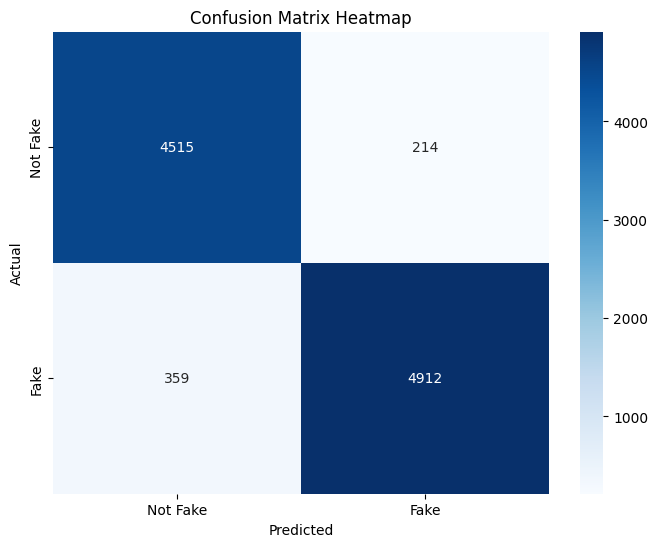

AUC-ROC: 0.9190


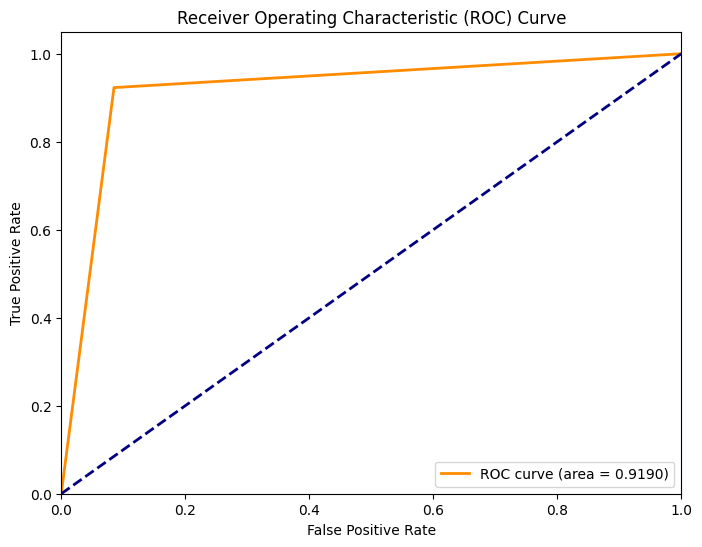

In [3]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix

# load model and vectorizer
with open('/content/drive/MyDrive/data/decision_tree_model.pkl', 'rb') as f:
    dtc_model = pickle.load(f)
with open('/content/drive/MyDrive/data/decision_tree_vectorizer.pkl', 'rb') as f:
    tfidf = pickle.load(f)

# load data
data = pd.read_csv('/content/drive/MyDrive/data/val_10k.csv')
X = data['news']
y = data['is_fake']

# vectorize with TF-IDF
X_vectorized = tfidf.transform(X)

# predict
y_pred = (dtc_model.predict(X_vectorized) > 0.5).astype("int32")

# evaluation
print("Classification Report:")
print(classification_report(y, y_pred))

# confusion matrix
print("Confusion Matrix:")
cfm = confusion_matrix(y, y_pred)
print(cfm)
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# AUC-ROC Calculation
y_pred_proba = dtc_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print(f"AUC-ROC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()